In [1]:
import numpy as np
import matplotlib.pyplot as plt
import marker

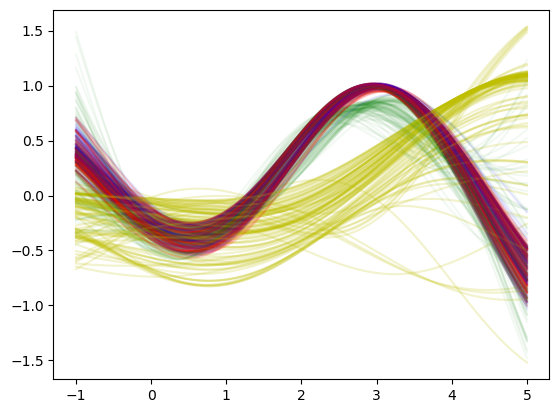

In [2]:
kmax = 0.3
mk = marker.Marker(kmax=kmax)
mk5 = marker.Marker(kmax=kmax, n_nodes=5)
mkl = marker.Marker(kmax=0.1)

delta_hires = np.linspace(mk.delta_range[0], mk.delta_range[1], 1024)
mks_tot = []
mks_Om = []
mks_s8 = []
mks_n5 = []
mks_kl = []

for seed in range(1001, 1101):
    n = np.load(f"k0p3_optTotal/seed{seed}_data.npz")['nodes']
    mkf = mk.get_mark_from_nodes(n)
    mark = mkf(delta_hires)
    sig = np.sign(n[-2])
    mks_tot.append(sig*mark)
    plt.plot(delta_hires, sig*mark, 'r-', alpha=0.2)

    n = np.load(f"k0p3_optOm/seed{seed}_data.npz")['nodes']
    mkf = mk.get_mark_from_nodes(n)
    mark = mkf(delta_hires)
    sig = np.sign(n[-2])
    mks_Om.append(sig*mark)
    plt.plot(delta_hires, sig*mark, 'b-', alpha=0.1)

    n = np.load(f"k0p3_opts8/seed{seed}_data.npz")['nodes']
    mkf = mk.get_mark_from_nodes(n)
    mark = mkf(delta_hires)
    sig = np.sign(n[-2])
    mks_s8.append(sig*mark)
    plt.plot(delta_hires, sig*mark, 'g-', alpha=0.05)

    n = np.load(f"k0p3_optTotal_nn5/seed{seed}_data.npz")['nodes']
    mkf = mk5.get_mark_from_nodes(n)
    mark = mkf(delta_hires)
    sig = np.sign(n[-2])
    mks_n5.append(sig*mark)
    plt.plot(delta_hires, sig*mark, 'g-', alpha=0.05)

    n = np.load(f"k0p1_optTotal/seed{seed}_data.npz")['nodes']
    mkf = mkl.get_mark_from_nodes(n)
    mark = mkf(delta_hires)
    sig = -np.sign(n[1])
    mks_kl.append(sig*mark)
    plt.plot(delta_hires, sig*mark, 'y-', alpha=0.2)
mks_tot = np.array(mks_tot)
mks_Om = np.array(mks_Om)
mks_s8 = np.array(mks_s8)
mks_n5 = np.array(mks_n5)
mks_kl = np.array(mks_kl)

Text(0, 0.5, '$M(\\delta_R)$')

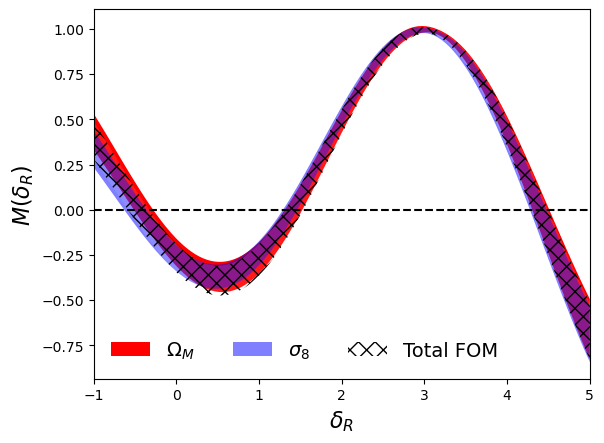

In [3]:
plt.fill_between(delta_hires,
                 np.mean(mks_Om, axis=0)-np.std(mks_Om, axis=0),
                 np.mean(mks_Om, axis=0)+np.std(mks_Om, axis=0),
                 facecolor='r', alpha=1.0, label=r'$\Omega_M$')
plt.fill_between(delta_hires,
                 np.mean(mks_s8, axis=0)-np.std(mks_s8, axis=0),
                 np.mean(mks_s8, axis=0)+np.std(mks_s8, axis=0),
                 facecolor='b', alpha=0.5, label=r'$\sigma_8$')
plt.fill_between(delta_hires,
                 np.mean(mks_tot, axis=0)-np.std(mks_tot, axis=0),
                 np.mean(mks_tot, axis=0)+np.std(mks_tot, axis=0),
                 facecolor='w', alpha=0.1, hatch='xx', label='Total FOM')
plt.axhline(0, c='k', ls='--')
plt.legend(loc='lower left', frameon=False, fontsize=14, ncol=3)
plt.xlim([-1, 5])
plt.xlabel(r'$\delta_R$', fontsize=16)
plt.ylabel(r'$M(\delta_R)$', fontsize=16)

Text(0, 0.5, '$M(\\delta_R)$')

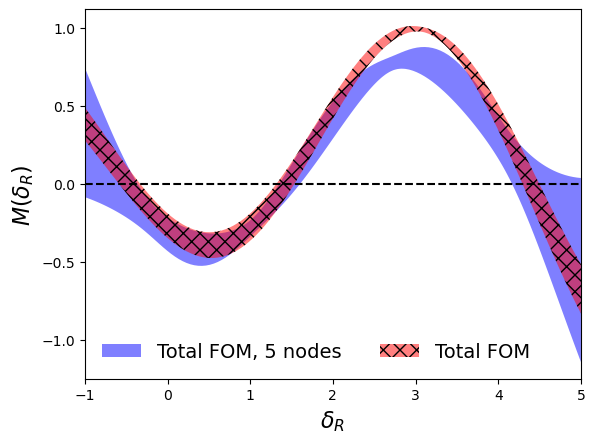

In [4]:
plt.fill_between(delta_hires,
                 np.mean(mks_n5, axis=0)-np.std(mks_n5, axis=0),
                 np.mean(mks_n5, axis=0)+np.std(mks_n5, axis=0),
                 facecolor='b', alpha=0.5, label='Total FOM, 5 nodes')
plt.fill_between(delta_hires,
                 np.mean(mks_tot, axis=0)-np.std(mks_tot, axis=0),
                 np.mean(mks_tot, axis=0)+np.std(mks_tot, axis=0),
                 facecolor='r', alpha=0.5, hatch='xx', label='Total FOM')
plt.axhline(0, c='k', ls='--')
plt.legend(loc='lower left', frameon=False, fontsize=14, ncol=3)
plt.xlim([-1, 5])
plt.xlabel(r'$\delta_R$', fontsize=16)
plt.ylabel(r'$M(\delta_R)$', fontsize=16)

Text(0, 0.5, '$M(\\delta_R)$')

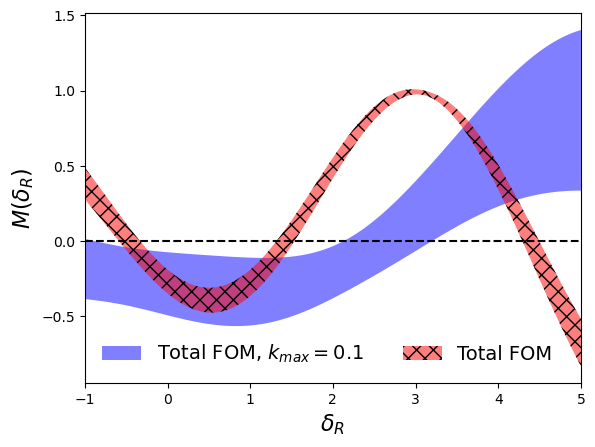

In [5]:
plt.fill_between(delta_hires,
                 np.mean(mks_kl, axis=0)-np.std(mks_kl, axis=0),
                 np.mean(mks_kl, axis=0)+np.std(mks_kl, axis=0),
                 facecolor='b', alpha=0.5, label='Total FOM, $k_{max}=0.1$')
plt.fill_between(delta_hires,
                 np.mean(mks_tot, axis=0)-np.std(mks_tot, axis=0),
                 np.mean(mks_tot, axis=0)+np.std(mks_tot, axis=0),
                 facecolor='r', alpha=0.5, hatch='xx', label='Total FOM')
plt.axhline(0, c='k', ls='--')
plt.legend(loc='lower left', frameon=False, fontsize=14, ncol=3)
plt.xlim([-1, 5])
plt.xlabel(r'$\delta_R$', fontsize=16)
plt.ylabel(r'$M(\delta_R)$', fontsize=16)